In [12]:
import os
import sys
import random

import numpy as np

from scipy import optimize

from astropy import units as u
from astropy.coordinates import SkyCoord, Angle
from astropy.table import Table
from astropy.io import fits

In [13]:
%matplotlib inline
from matplotlib import rcParams, style
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

rcParams['image.cmap'] = 'viridis'
rcParams['image.origin'] = 'lower'
rcParams['axes.prop_cycle'] = style.library['seaborn-deep']['axes.prop_cycle']
rcParams['figure.figsize'] = (14, 8)
rcParams['axes.titlesize'] =  rcParams['axes.labelsize'] = 16
rcParams['xtick.labelsize'] =  rcParams['ytick.labelsize'] = 14

In [172]:
shape = (100, 8)

vs = (np.random.randn(*shape)*4 + 170)*u.km/u.s
rs = (np.random.rand(*shape))*2*u.arcmin
thetas = np.random.rand(*shape)*360*u.deg

In [171]:
def find_max_axis(t, v):    
    pas = np.linspace(0, 360,100).reshape(100, 1)
    
    chi2s = []
    for pa in pas:
        t = Angle(pa*u.deg + t).wrap_at(360*u.deg)
        lowv = np.mean(v[t<180*u.deg])
        upv = np.mean(v[t>180*u.deg])
        chi2s.append((lowv-upv).value**2)
    maxi = np.argsort(chi2s)[-1]
    return pas[maxi], chi2s[maxi]

10 loops, best of 3: 44.1 ms per loop


In [173]:
best_pas = []
for t, v in zip(thetas, vs):
    best_pas.append(find_max_axis(t, v)[0])

/Users/erik/miniconda3/envs/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/erik/miniconda3/envs/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


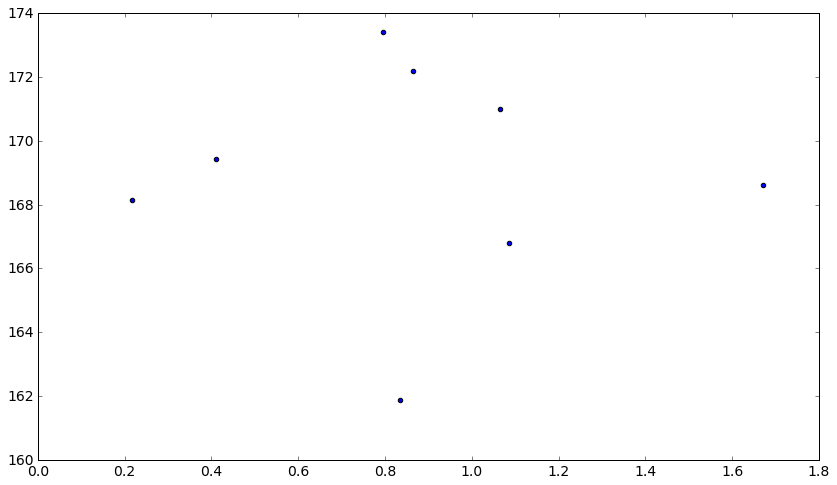

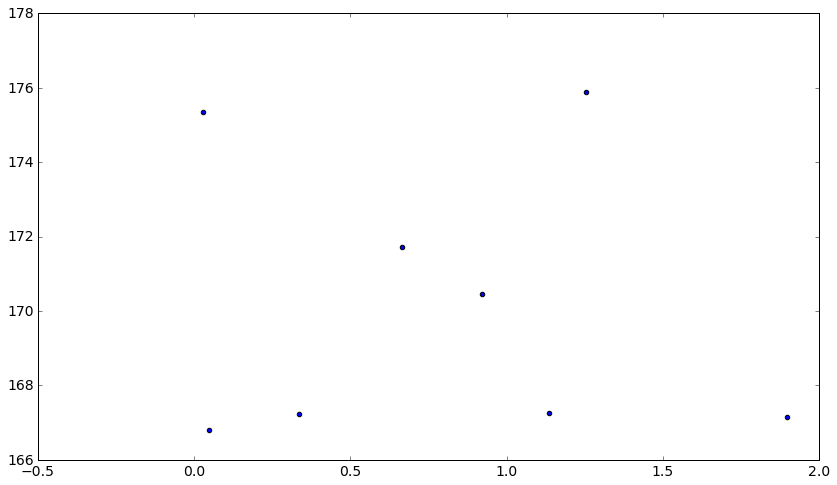

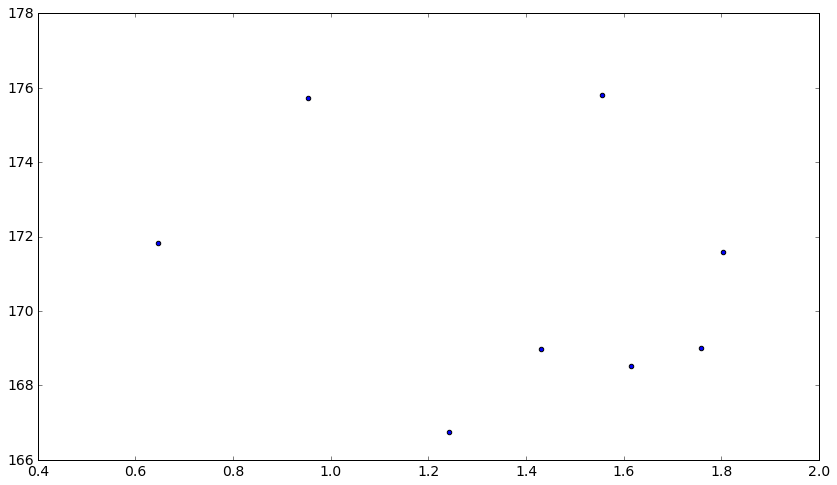

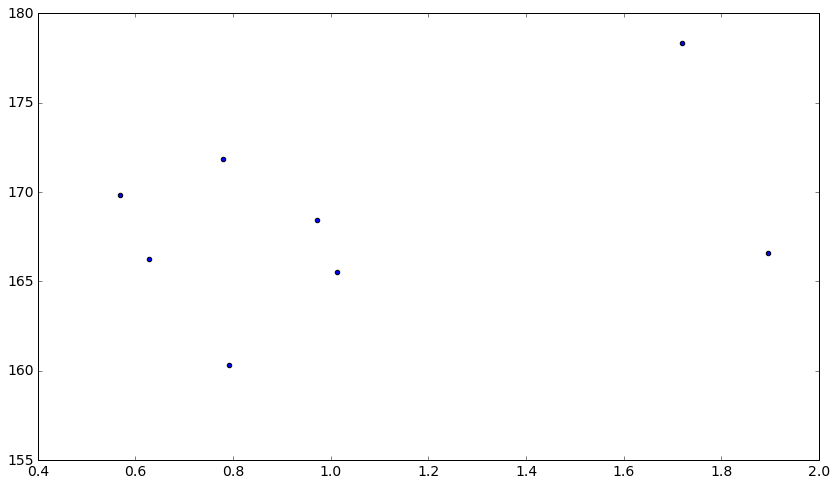

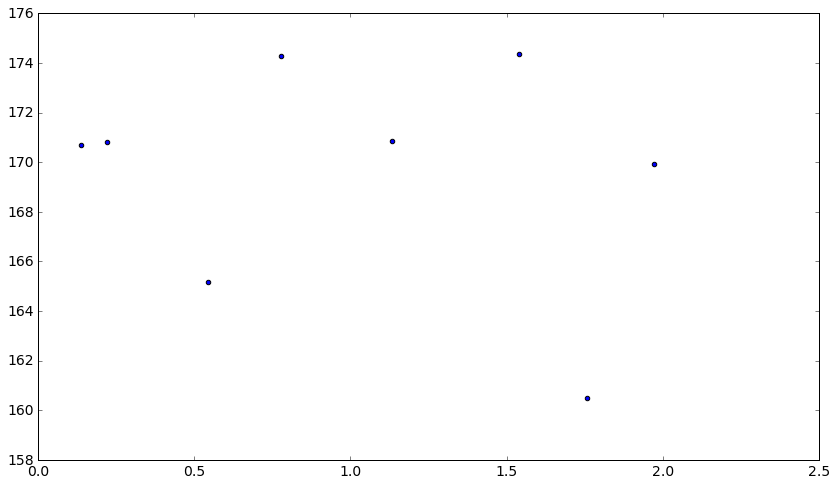

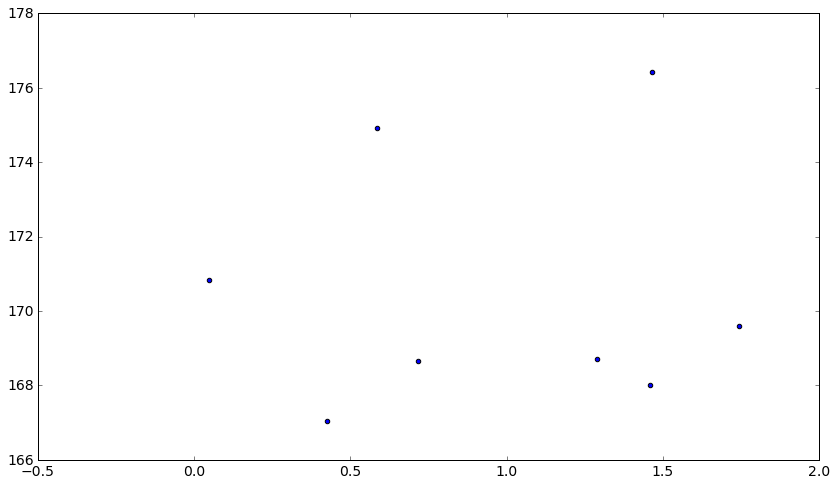

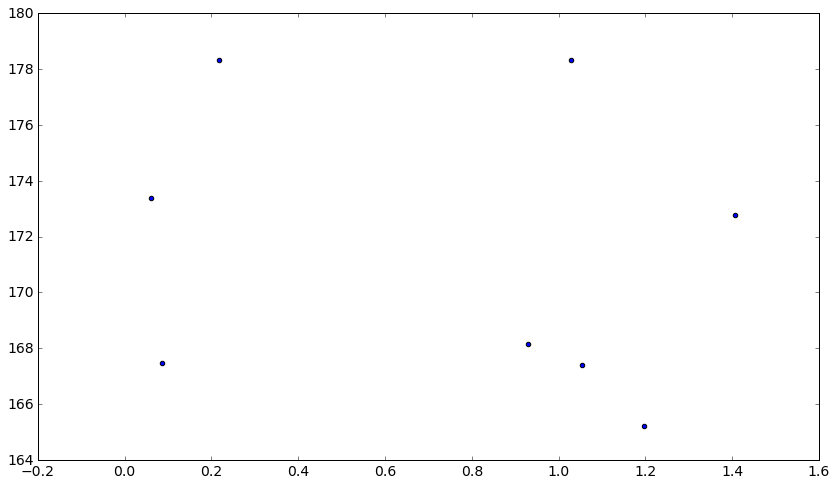

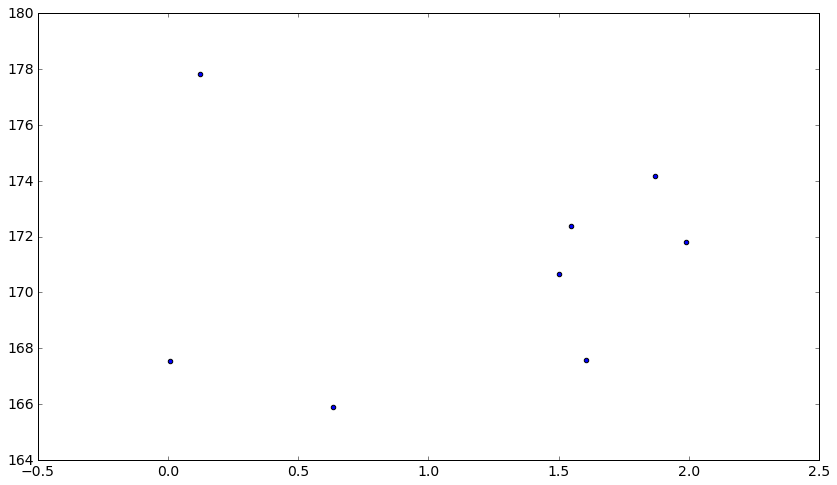

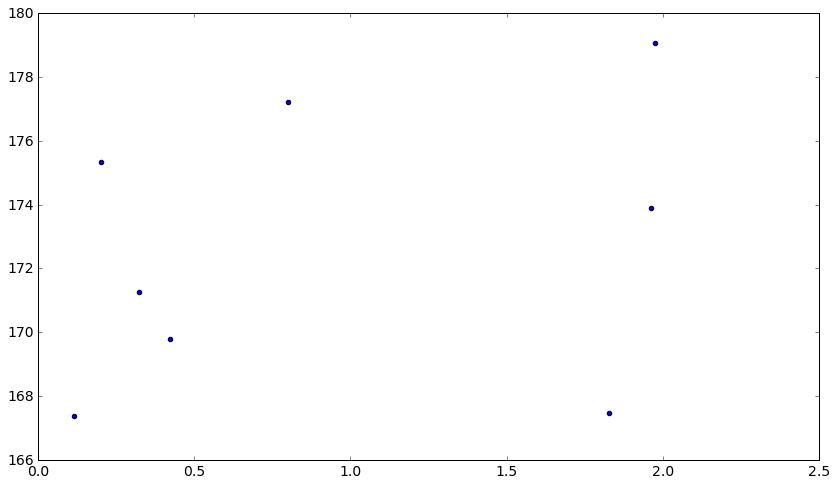

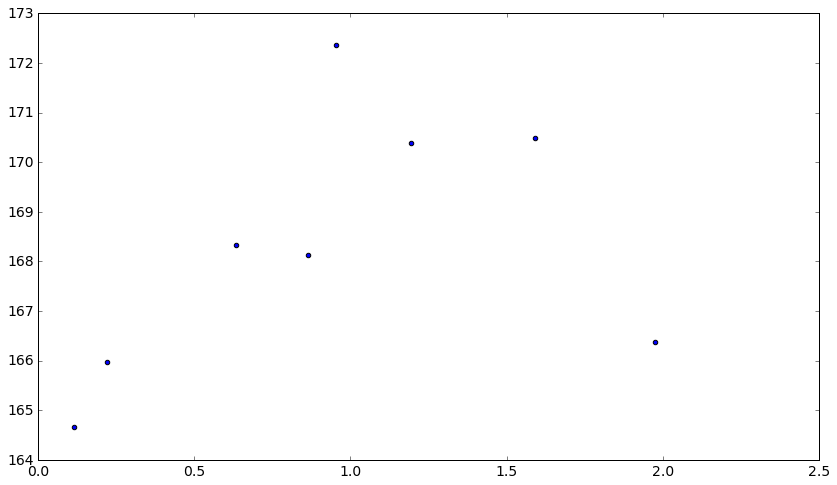

In [203]:
zz = list(zip(best_pas, rs, vs, thetas))
random.shuffle(zz)


for i,(pa, r, v,t)  in enumerate(zz):
    if i>=10:
        break
    plt.figure()
    plt.scatter(r, v)